# Analises e partes do roteiro

## 1 - Objetivo geral (proposta): Detectar os estados com menor taxa de visitação ao longo do ano por vias terrestres e rotas de viagem pouco exploradas.

1. Vertices: Estados do Brasil
2. Arestas: Origem - Destino (são arestas direcionadas) **Laços representam viagens dentro do próprio estado.
3. Peso: Quantidade de viagens entre estados.
4. link de acesso aos dados: https://dados.gov.br/dados/conjuntos-dados/matriz-origem-destino-passageiros-base-bigdata-telefonia-movel

## 2 - Objetivos Especificos:
1. Coletar e processar os dados de origem-destino de passageiros por vias não-aéreas. ✅
2. Analisar o fluxo de viagens entre os estados brasileiros. (grau de entrada e saída e centralidade) ✅
3. Detectar os estados com baixa taxa de visitação ao longo do ano. ✅
4. Identificar rotas terrestres pouco exploradas entre os estados.
5. Plotar analíses para facilitar o entendimento. ✅

### Desenvolvimento:
1. Falar sobre o processo de escrita do grafo, ferramentas e explicar as analises obtidas a partir de cada algoritmo executado.


### Considerações finais
1. Tentar entender as razões pelas quais as rotas são pouco utilizadas.
2. Propor intervenções ou recomendações de políticas para incentivar maior visitação ou melhor aproveitamento das rotas subutilizadas.


## Analises iniciais tiradas a partir de visualização simples:
* Grau de entrada e saída:  Os estados com menor visitação e consequemente também menor evasão, são majoritariamente estados do norte, o que é evidenciado pelo grau de entrada e saída.

* Acre, Roraima, Sergipe, Amapá e Espirito Santo foram os estados com maior taxa de centralidade, indicando que são vertices importantes quando falamos de rotas de baixa visitação, o que o algoritmo de Dijkstra deixa claro ao mostrar que estes estados estão diretamente envolvidos nos caminhos mais curtos do grafo, evidenciando rotas pouco exploradas e regiões pouco visitadas (nesse caso, quanto maior a centralidade, menos viagens aquele determinado vertice recebe e consequentemente, se torna um hub importante para a analise de baixa visitação (altamente visitado no que diz caminhos mais curtos, porém, baixo em número de viagens recebidas)).

* O grafo é completo, o que indica forte conexão entre os vertices e dispensa a aplicação do algoritmo de Warshal, já que todos os vertices são alcançaveis

* Sobre Dijkstra, nesse grafo em especifico ele funciona da seguinte forma: procura o caminho com menos viagens até um dado ponto (por vias de entendimento, ele evidencia principalmente caminhos de baixa visitação e rotas muito pouco utilizadas.)

* Clusters baseados em Centralidade de closeness (usando k-means)
* Estudo de caso: Paraíba, quais estados menos visitamos? quais as rotas de baixa visitação?


___________________________________________________________________________________________________

# Código do Projeto

___________________________________________________________________________________________________

## Ferramentas utilizadas:



In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Abrindo e tratando os dados de forma preliminar

In [2]:
# Carregar os dados
df = pd.read_csv('/home/maat/Grafos/matriz_od_nao_aerea-03-2022.csv', delimiter=';')


In [3]:
df = df.dropna(subset=['UFUTPdestinounicipio'])

# Selecionar as colunas de interesse
df_estado = df[['UFUTPorigemunicipio', 'UFUTPdestinounicipio', 'quantidadeviagem']]




In [4]:
# Dados de latitude e longitude dos centros dos estados do Brasil
data = {
    'Estado': ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG',
               'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'],
    'Latitude': [-9.0237, -9.7161, -3.4161, 1.4100, -12.9714, -5.6818, -15.7801, -20.3155, -15.6000,
                 -5.6818, -12.6370, -20.5000, -19.8157, -5.8661, -7.1194, -23.5505, -8.0476, -7.1094,
                 -22.9035, -5.7945, -30.0346, -10.9472, -1.4486, -27.5954, -23.5505, -10.9472, -10.1767],
    'Longitude': [-67.7357, -36.6614, -65.0580, -51.7500, -38.5014, -39.2904, -47.9292, -40.3128, -49.2650,
                  -45.0250, -56.0790, -54.6390, -43.4786, -49.7799, -34.8553, -51.9253, -34.8772, -42.8034,
                  -43.2096, -35.2110, -51.2187, -63.3250, -61.2350, -50.4781, -46.6333, -37.0731, -48.2996]
}

df_lat_long = pd.DataFrame(data)

# Criar um dicionário de posições diretamente a partir do DataFrame
positions_estados = dict(zip(df_lat_long['Estado'], zip(df_lat_long['Longitude'], df_lat_long['Latitude'])))

In [5]:
# validando dados dos estados

estados_validos = ['MT', 'RJ', 'SP', 'ES', 'RO', 'MG', 'DF', 'PR', 'MS', 'PA', 'AM', 'SC', 'CE', 'GO', 'AL', 'BA', 'AC', 'PE', 'RN', 'RS', 'TO', 'PI', 'SE', 'RR', 'PB', 'AP', 'MA']
df_validado = df[df['UFUTPorigemunicipio'].isin(estados_validos) & df['UFUTPdestinounicipio'].isin(estados_validos)]


## Criando o grafo

In [6]:

grafo_brasil = nx.DiGraph()

for _, row in df_validado.iterrows():
    origem = row['UFUTPorigemunicipio']
    destino = row['UFUTPdestinounicipio']
    peso = row['quantidadeviagem']
    if destino != origem:
      # Adicionar aresta com peso, se já existir, somar os pesos
      if grafo_brasil.has_edge(origem, destino):
          grafo_brasil[origem][destino]['weight'] += peso
      else:
          grafo_brasil.add_edge(origem, destino, weight=peso)


## Plotando os grafo de forma mais crua

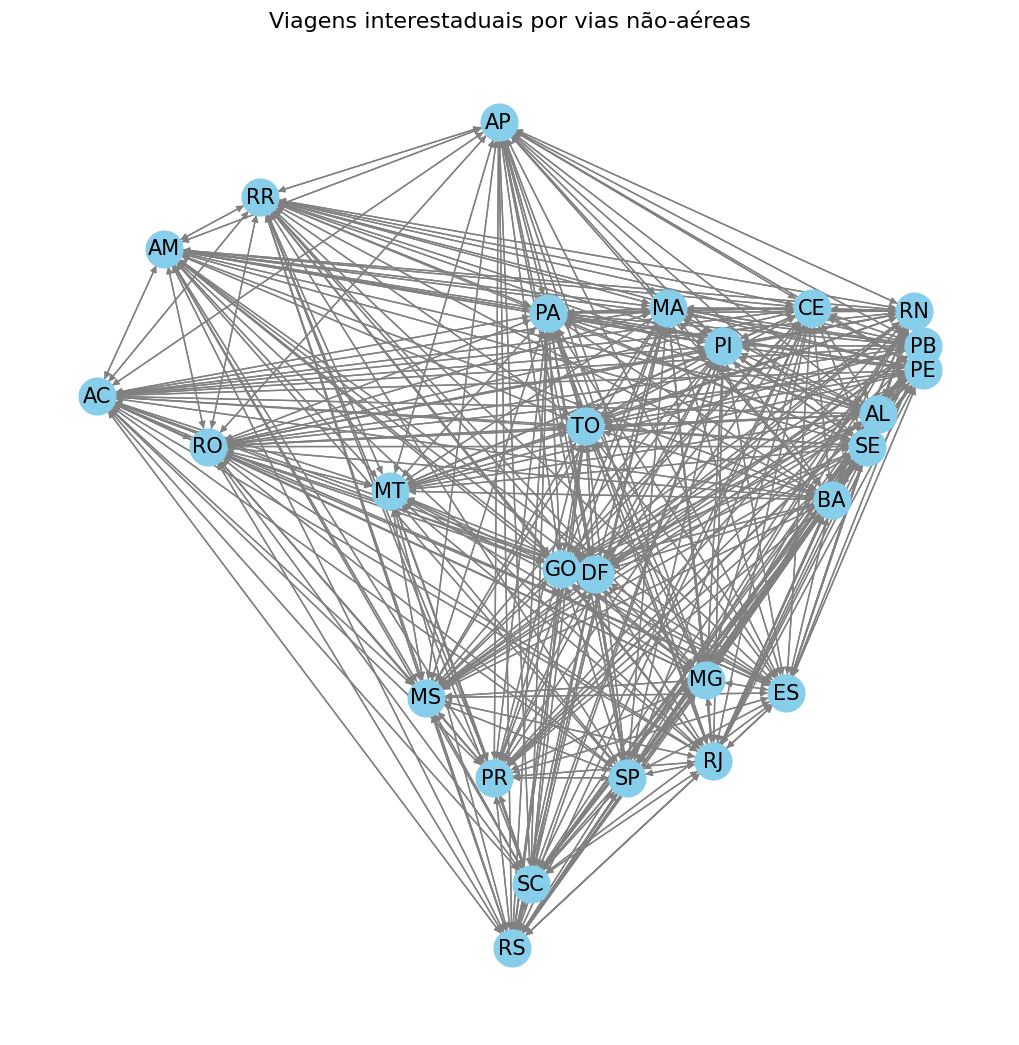

In [7]:
# Desenhando o grafo
plt.figure(figsize=(10, 10))
nx.draw(grafo_brasil, pos = positions_estados, with_labels=True, node_color='skyblue', node_size=700, font_size=15, font_color='black', edge_color='gray')
plt.title("Viagens interestaduais por vias não-aéreas", fontsize=16)
plt.show()

## Dados de Entrada e saída e centralidade


In [8]:
# Calcular o grau de entrada e saída
in_degrees = dict(grafo_brasil.in_degree(weight='weight'))  # Converte para dicionário
out_degrees = dict(grafo_brasil.out_degree(weight='weight'))  # Converte para dicionário

# Ordenar o grau de entrada em ordem crescente
sorted_in_degrees = dict(sorted(in_degrees.items(), key=lambda item: item[1]))

# Ordenar o grau de saída em ordem crescente
sorted_out_degrees = dict(sorted(out_degrees.items(), key=lambda item: item[1]))

# Printar os estados com grau de entrada em ordem
print("Estados com grau de entrada em ordem crescente:")
for estado, grau in sorted_in_degrees.items():
    print(f"{estado}: {grau}")

# Printar os estados com grau de saída em ordem
print("\nEstados com grau de saída em ordem crescente:")
for estado, grau in sorted_out_degrees.items():
    print(f"{estado}: {grau}")

Estados com grau de entrada em ordem crescente:
AC: 208035
AP: 399650
RR: 585265
RO: 647317
AM: 1577526
MT: 1595877
PA: 2552192
TO: 3425343
ES: 3961642
MA: 4898650
PI: 5363938
SE: 6567398
CE: 6934813
MS: 7571929
AL: 8844721
RN: 9569829
RS: 10080980
BA: 13973503
RJ: 14587655
SC: 17499615
PB: 19382001
PR: 21361459
PE: 23638303
MG: 37517274
DF: 39638387
GO: 45362606
SP: 46883823

Estados com grau de saída em ordem crescente:
AC: 200768
AP: 403652
RR: 571929
RO: 625694
MT: 1594934
AM: 1677095
PA: 2480533
TO: 3447076
ES: 4002054
MA: 4652887
PI: 5726163
SE: 6591632
CE: 7062026
MS: 7390136
AL: 8755614
RN: 9710824
RS: 10410700
BA: 13765227
RJ: 14693979
SC: 17193630
PB: 19420998
PR: 21497833
PE: 23281273
MG: 37687449
DF: 39162479
GO: 45439149
SP: 47183997


In [9]:
# Suponha que 'grafo_brasil' seja o seu grafo
# Calcular a centralidade de betweenness e closeness
centralidade_betweenness = nx.betweenness_centrality(grafo_brasil, weight='weight')
centralidade_closeness = nx.closeness_centrality(grafo_brasil, distance='weight')

# Converter para DataFrame
df_centralidade = pd.DataFrame({
    'Estado': list(centralidade_betweenness.keys()),
    'Centralidade de Betweenness': list(centralidade_betweenness.values()),
    'Centralidade de Closeness': list(centralidade_closeness.values())
})

# Ordenar por centralidade de betweenness em ordem crescente
df_centralidade_sorted_betweenness = df_centralidade.sort_values(by='Centralidade de Betweenness')

print("Ordenado por Centralidade de Betweenness:")
print(df_centralidade_sorted_betweenness)

# Ordenar por centralidade de closeness em ordem crescente
df_centralidade_sorted_closeness = df_centralidade.sort_values(by='Centralidade de Closeness')

print("\nOrdenado por Centralidade de Closeness:")
print(df_centralidade_sorted_closeness)


Ordenado por Centralidade de Betweenness:
   Estado  Centralidade de Betweenness  Centralidade de Closeness
0      PA                     0.000000                   0.000536
2      BA                     0.000000                   0.000718
3      MA                     0.000000                   0.000888
4      PI                     0.000000                   0.000827
6      SC                     0.000000                   0.000728
5      RJ                     0.000000                   0.000415
7      SP                     0.000000                   0.000221
8      PR                     0.000000                   0.000616
15     GO                     0.000000                   0.000296
10     AL                     0.000000                   0.000907
11     AM                     0.000000                   0.000719
12     CE                     0.000000                   0.000228
13     DF                     0.000000                   0.000252
18     MT                     0.00

## Funções para facilitar a plotagem do grau de entrada e saída

In [10]:
def plotargrau(tipo, graus, fatiamento):
  # Pegar os 5 primeiros estados de grau de entrada

  top_n = list(graus.items())[:fatiamento]

  # Criar DataFrame para a tabela
  df_top_n = pd.DataFrame({
        'Estado': [estado for estado, _ in top_n],
        f'Grau de {tipo}': [grau for _, grau in top_n]
    })

  # Plotar o grafo com destaque para os 5 estados de menor grau de entrada
  plt.figure(figsize=(12, 12))


  # Desenhar todos os nós e arestas
  nx.draw(grafo_brasil, pos=positions_estados, with_labels=True, node_color='skyblue', node_size=700,
          font_size=12, font_color='black', edge_color='gray')

  # Destacar os 5 primeiros de entrada com um tamanho maior e cor diferente
  highlight_nodes_in = [estado for estado, _ in top_n]
  nx.draw_networkx_nodes(grafo_brasil, pos=positions_estados, nodelist=highlight_nodes_in, node_color='orange', node_size=1000)

  # Desenhar novamente para garantir que o texto e as bordas dos nós destacados estejam visíveis
  nx.draw_networkx_labels(grafo_brasil, pos=positions_estados, font_size=12, font_color='black')
  nx.draw_networkx_edges(grafo_brasil, pos=positions_estados, edge_color='gray')

  # Adicionar título
  plt.title(f"Estados com menor grau de {tipo}", fontsize=16)

  # Adicionar a tabela ao lado do grafo
  plt.table(cellText=df_top_n.values, colLabels=df_top_n.columns, loc='right', cellLoc='center', colColours=['#ccccff']*2)

  # Ajustar o layout manualmente
  plt.subplots_adjust(left=0.1, right=0.7, top=0.9, bottom=0.1)

  # Mostrar o gráfico
  plt.show()

## Grau de Entrada

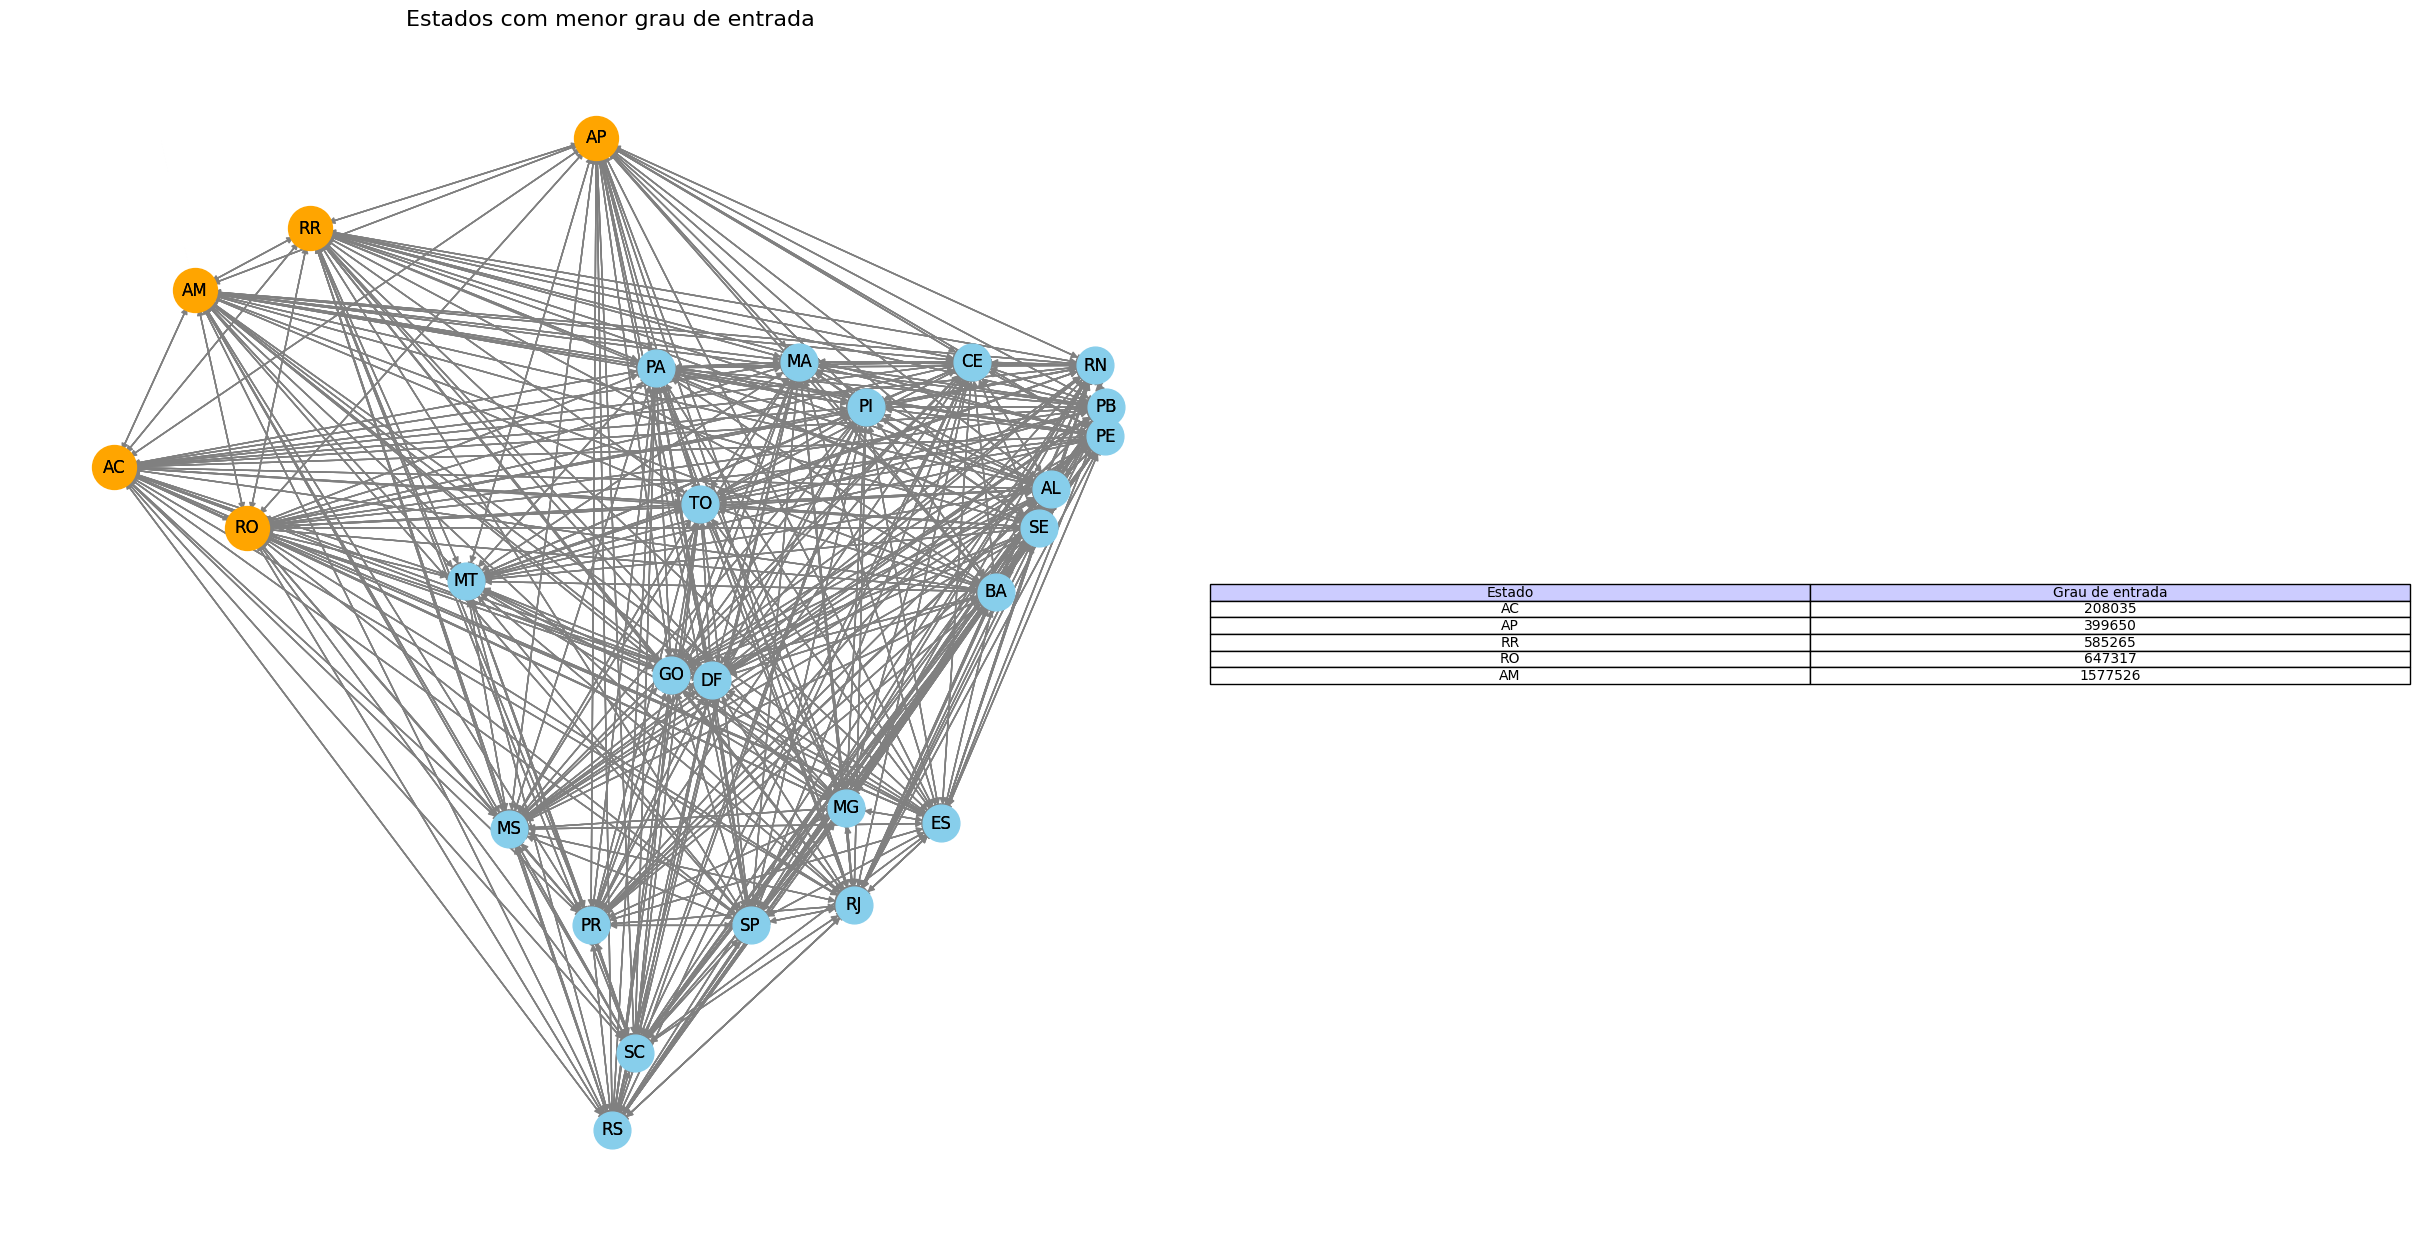

In [11]:
plotargrau('entrada', sorted_in_degrees, 5)

## Grau de saída

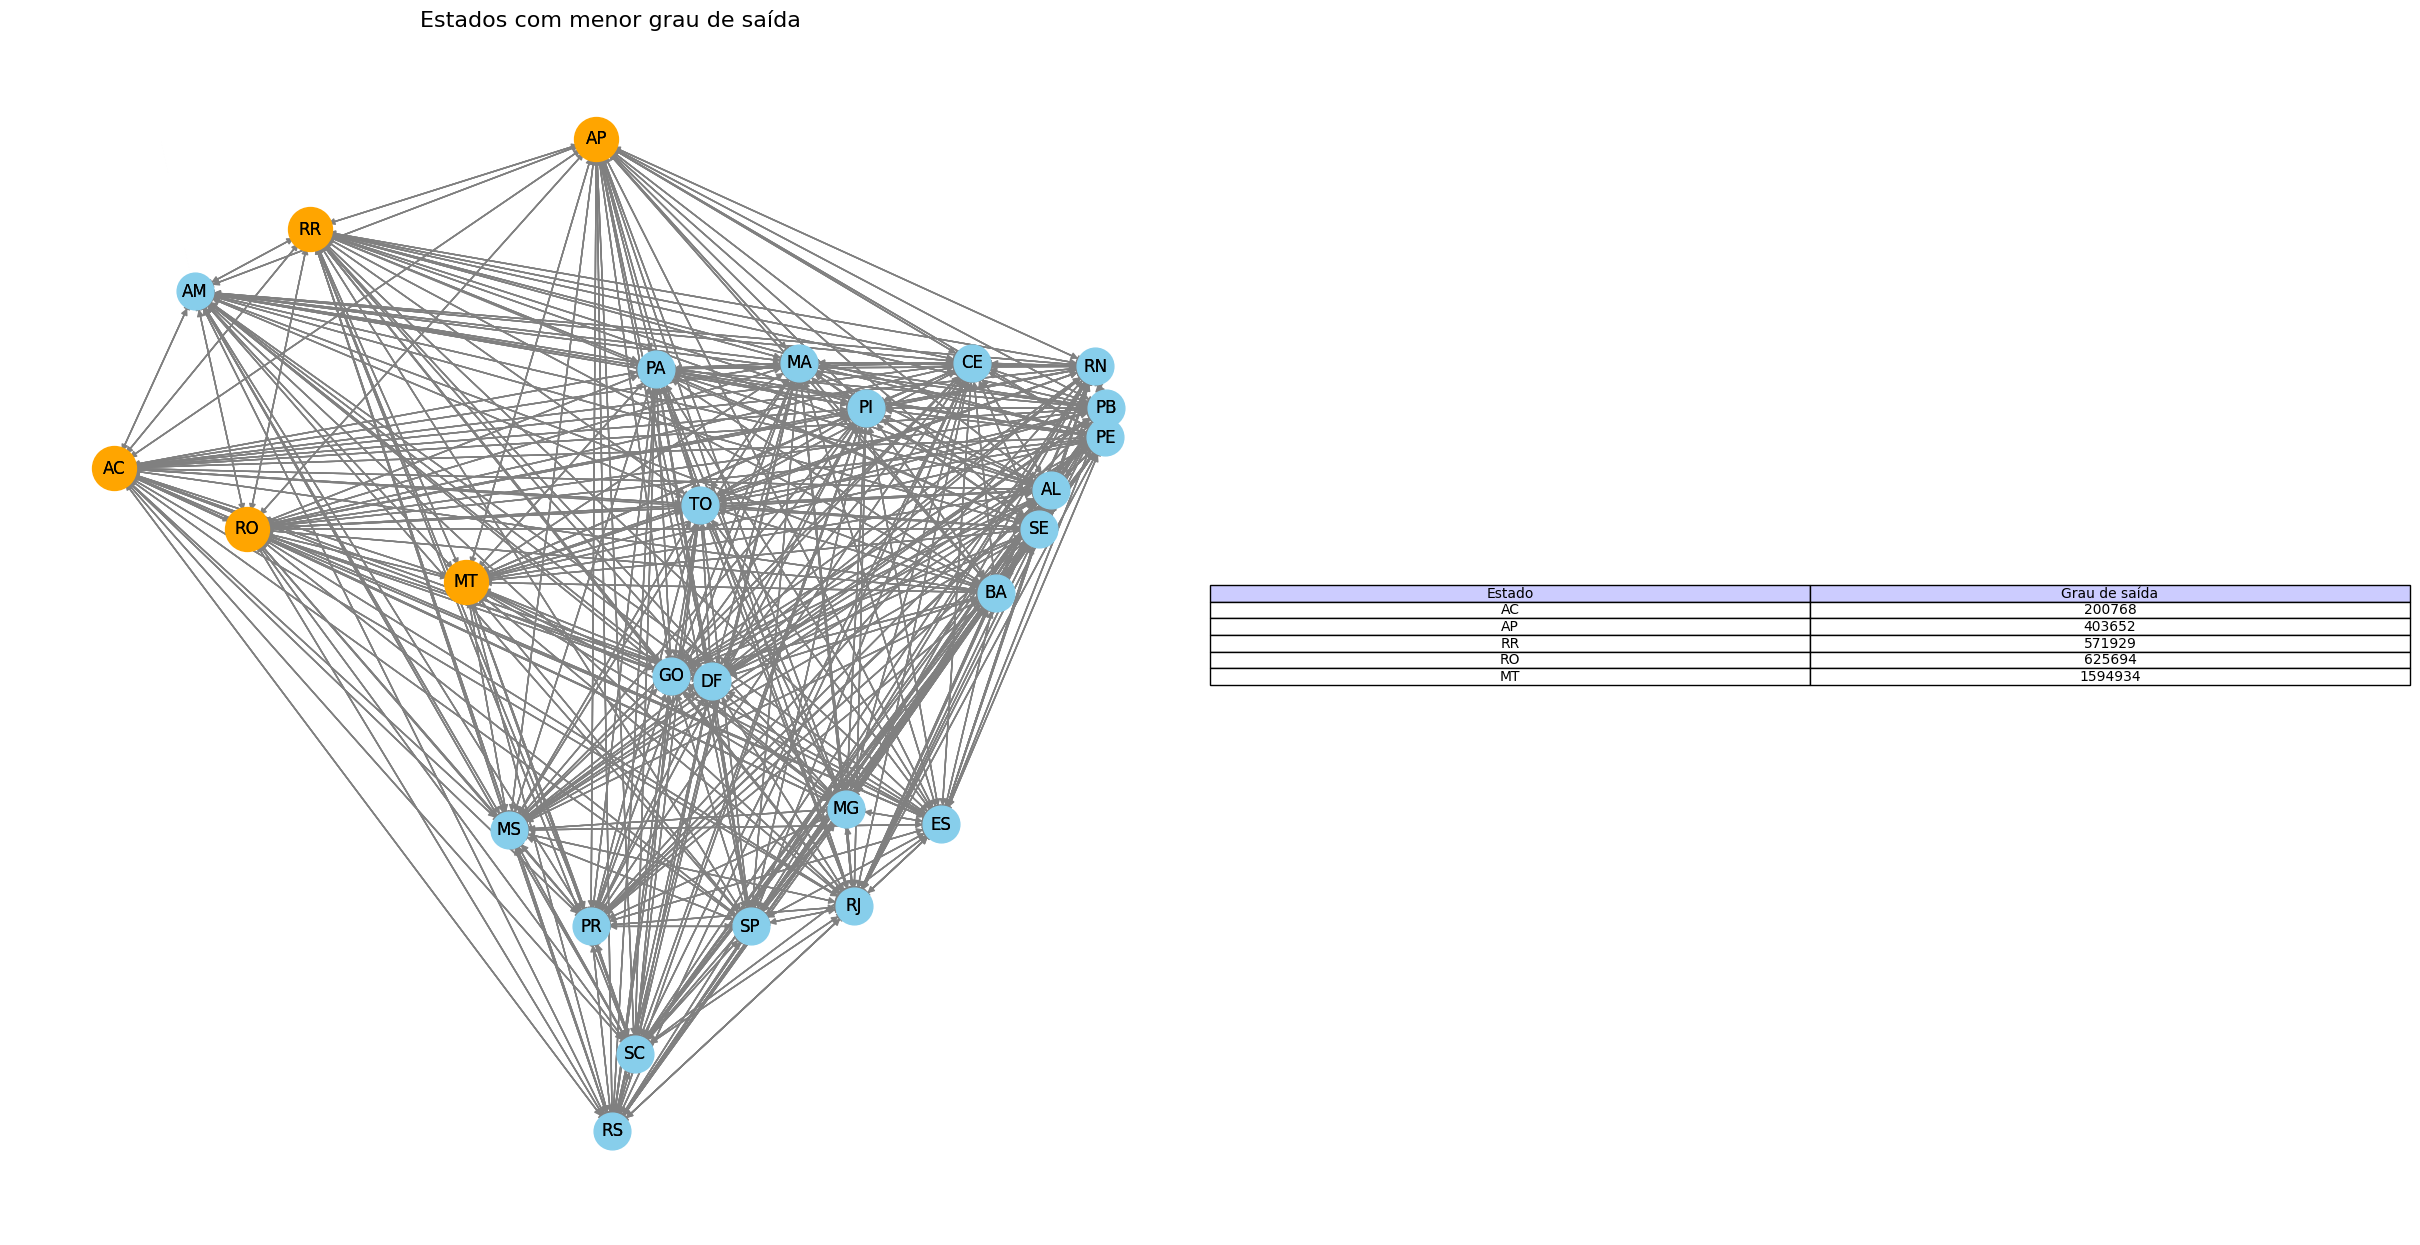

In [12]:
plotargrau('saída', sorted_out_degrees, 5)

## Caminhos mais curtos (Aplicando Dijkstra, falta representação visual)

In [13]:
# Lista para armazenar os caminhos e suas quantidades de viagens
caminhos_mais_curtos = []

# Iterar sobre todos os pares de estados no grafo
for estado_origem in grafo_brasil.nodes:
    for estado_destino in grafo_brasil.nodes:
        if estado_origem != estado_destino:  # Evitar laços (origem e destino iguais)
            try:
                # Calcular o caminho com menor quantidade de viagens entre o estado_origem e o estado_destino
                caminho = nx.shortest_path(grafo_brasil, source=estado_origem, target=estado_destino, weight='weight')
                num_viagens = nx.shortest_path_length(grafo_brasil, source=estado_origem, target=estado_destino, weight='weight')

                # Armazenar o caminho e a quantidade de viagens em uma lista
                caminhos_mais_curtos.append((estado_origem, estado_destino, caminho, num_viagens))
            except nx.NetworkXNoPath:
                # Caso não haja caminho entre os estados, ignorar
                pass

# Ordenar os caminhos pela quantidade total de viagens em ordem crescente
caminhos_mais_curtos_ordenados = sorted(caminhos_mais_curtos, key=lambda x: x[3])

# Extrair os 5 caminhos com menor número de viagens
top_5_caminhos = caminhos_mais_curtos_ordenados[:5]

# Exibir os 5 caminhos com menor número de viagens
print("Os 5 caminhos com menor número de viagens:")
for origem, destino, caminho, num_viagens in top_5_caminhos:
    print(f"{origem} -> {destino}: {caminho}, Número de viagens: {num_viagens}")

Os 5 caminhos com menor número de viagens:
AP -> SE: ['AP', 'SE'], Número de viagens: 10
ES -> AC: ['ES', 'AC'], Número de viagens: 12
SE -> RR: ['SE', 'RR'], Número de viagens: 13
SE -> AC: ['SE', 'AC'], Número de viagens: 20
AP -> RR: ['AP', 'SE', 'RR'], Número de viagens: 23


CASO ESPECIFICO: quais caminhos mais curtos para a Paraíba?

In [14]:
# Definir o estado de interesse: Paraíba
estado_interesse = 'PB'

# Lista para armazenar os caminhos e suas quantidades de viagens
caminhos_para_paraiba = []

# Iterar sobre todos os estados no grafo, considerando a Paraíba como origem ou destino
for estado in grafo_brasil.nodes:
    if estado != estado_interesse:  # Evitar laços (origem e destino iguais)
        try:
            # Calcular o caminho mais curto com a Paraíba como destino
            caminho_destino = nx.shortest_path(grafo_brasil, source=estado, target=estado_interesse, weight='weight')
            num_viagens_destino = nx.shortest_path_length(grafo_brasil, source=estado, target=estado_interesse, weight='weight')

            # Armazenar o caminho com a Paraíba como destino
            caminhos_para_paraiba.append((estado, estado_interesse, caminho_destino, num_viagens_destino))

            # Calcular o caminho mais curto com a Paraíba como origem
            caminho_origem = nx.shortest_path(grafo_brasil, source=estado_interesse, target=estado, weight='weight')
            num_viagens_origem = nx.shortest_path_length(grafo_brasil, source=estado_interesse, target=estado, weight='weight')

            # Armazenar o caminho com a Paraíba como origem
            caminhos_para_paraiba.append((estado_interesse, estado, caminho_origem, num_viagens_origem))

        except nx.NetworkXNoPath:
            # Caso não haja caminho entre os estados, ignorar
            pass

# Ordenar os caminhos pela quantidade total de viagens em ordem crescente
caminhos_mais_curtos_para_paraiba = sorted(caminhos_para_paraiba, key=lambda x: x[3])

# Extrair os 5 caminhos mais curtos envolvendo a Paraíba
top_5_caminhos_para_paraiba = caminhos_mais_curtos_para_paraiba[:5]

# Exibir os 5 caminhos com menor número de viagens envolvendo a Paraíba
print("Os 5 caminhos com menor número de viagens envolvendo a Paraíba:")
for origem, destino, caminho, num_viagens in top_5_caminhos_para_paraiba:
    print(f"{origem} -> {destino}: {caminho}, Número de viagens: {num_viagens}")

Os 5 caminhos com menor número de viagens envolvendo a Paraíba:
PB -> AP: ['PB', 'AP'], Número de viagens: 535
PB -> SE: ['PB', 'AP', 'SE'], Número de viagens: 545
AP -> PB: ['AP', 'PB'], Número de viagens: 556
PB -> RR: ['PB', 'AP', 'SE', 'RR'], Número de viagens: 558
PB -> AC: ['PB', 'AP', 'SE', 'AC'], Número de viagens: 565


## Conectividade do grafo

In [15]:
import networkx as nx

# Verificar componentes fortemente conexas
componentes_fortes = list(nx.strongly_connected_components(grafo_brasil))

# Exibir os componentes fortemente conexos
print("Componentes fortemente conexos:")
for componente in componentes_fortes:
    print(*componente, sep= " -> ")

# Verificar se a rede é completamente conectada
if len(componentes_fortes) == 1:
    print("A rede é fortemente conectada. Todos os estados podem alcançar uns aos outros seguindo as direções das rotas.")
else:
    print(f"A rede não é fortemente conectada. Existem {len(componentes_fortes)} subgrupos fortemente conectados.")


Componentes fortemente conexos:
RN -> GO -> SE -> PR -> RS -> PI -> RO -> SC -> RJ -> AM -> MG -> MA -> BA -> AL -> PE -> SP -> PB -> AP -> DF -> MT -> ES -> RR -> PA -> AC -> TO -> MS -> CE
A rede é fortemente conectada. Todos os estados podem alcançar uns aos outros seguindo as direções das rotas.


## Clusters (Falta melhorar o grafo plotado)

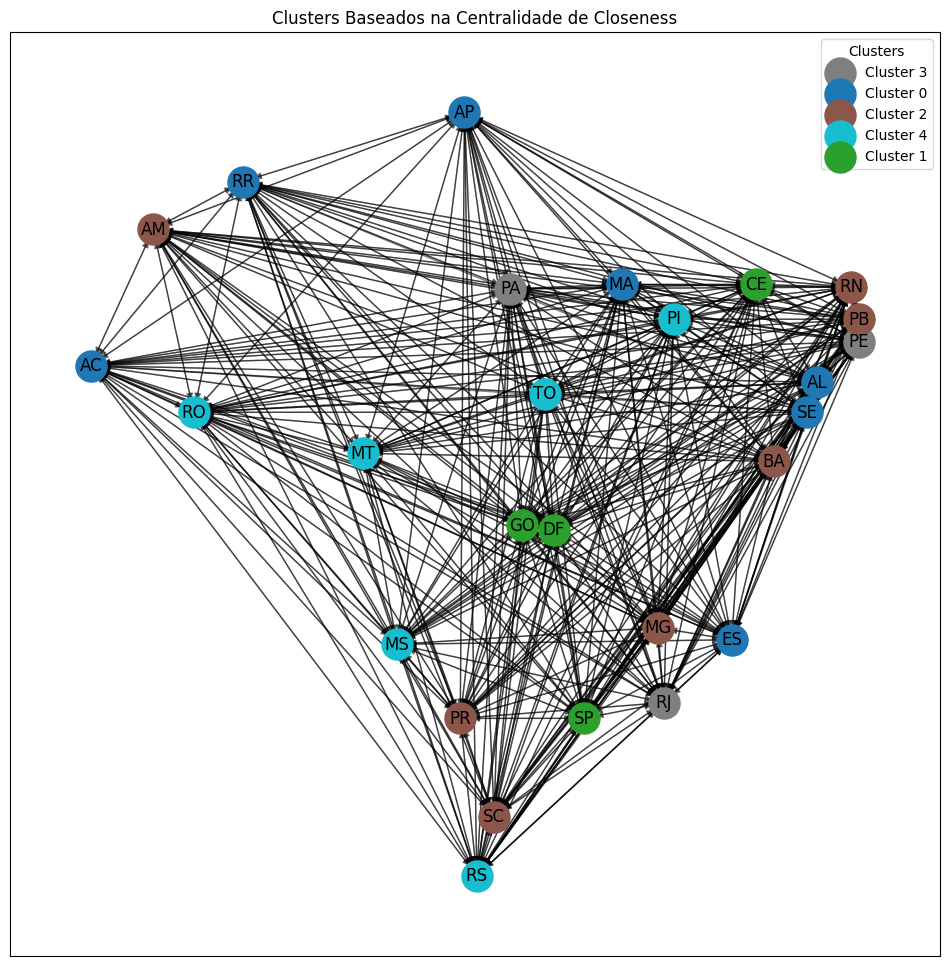

In [18]:
G_nx = grafo_brasil
# Calcular a centralidade de proximidade
centralidade_closeness = nx.closeness_centrality(G_nx, distance='weight')

# Preparar os dados para clusterização
df_centralidade = pd.DataFrame({
    'Estado': list(centralidade_closeness.keys()),
    'Centralidade de Closeness': list(centralidade_closeness.values())
})

# Transpor os dados para o formato de entrada do KMeans
X = df_centralidade[['Centralidade de Closeness']].values

# Aplicar o algoritmo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Ajuste o número de clusters conforme necessário
df_centralidade['Cluster'] = kmeans.fit_predict(X)

# Criar um dicionário de cores para os clusters
colors = plt.get_cmap('tab10')(np.linspace(0, 1, len(df_centralidade['Cluster'].unique())))

# Desenhar o grafo com clusters
plt.figure(figsize=(12, 12))
for cluster in df_centralidade['Cluster'].unique():
    nodes_in_cluster = df_centralidade[df_centralidade['Cluster'] == cluster]['Estado']
    nx.draw_networkx_nodes(G_nx, pos=positions_estados, nodelist=nodes_in_cluster, node_color=[colors[cluster]], label=f'Cluster {cluster}', node_size=500)
nx.draw_networkx_edges(G_nx, pos=positions_estados, alpha=0.5)
nx.draw_networkx_labels(G_nx, pos=positions_estados, font_size=12)
plt.title('Clusters Baseados na Centralidade de Closeness')
plt.legend(title='Clusters', loc='best')
plt.show()


In [19]:
# Ordenar o DataFrame por Centralidade de Closeness
df_centralidade_sorted_closeness = df_centralidade.sort_values(by='Centralidade de Closeness', ascending=False)
print("\nOrdenado por Centralidade de Closeness:")
print(df_centralidade_sorted_closeness)


Ordenado por Centralidade de Closeness:
   Estado  Centralidade de Closeness  Cluster
9      AC                   0.000946        0
23     RR                   0.000942        0
25     SE                   0.000924        0
1      AP                   0.000916        0
14     ES                   0.000909        0
10     AL                   0.000907        0
3      MA                   0.000888        0
17     MS                   0.000848        4
4      PI                   0.000827        4
24     RS                   0.000825        4
18     MT                   0.000806        4
26     TO                   0.000784        4
22     RO                   0.000773        4
21     RN                   0.000745        2
16     MG                   0.000742        2
6      SC                   0.000728        2
11     AM                   0.000719        2
2      BA                   0.000718        2
19     PB                   0.000619        2
8      PR                   0.000616   